In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from sklearn.cluster import KMeans
import pickle

from scipy.spatial.distance import cdist

In [2]:
def corvert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def SIFT(image):
    sift = cv2.SIFT_create()
    _, descriptors = sift.detectAndCompute(image, None)
    return  descriptors

In [8]:
def kmeans_bow(all_descriptors, num_clusters):

    bow_dict = []
    kmeans = KMeans(n_clusters=num_clusters, verbose = 1).fit(all_descriptors)
    bow_dict = kmeans.cluster_centers_
    
    return bow_dict

In [12]:
path = 'D:\\Nhat\\term_8\\MDS\src\\1'

features = []
image_features = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        image = cv2.imread(os.path.join(dirname, filename))
        gray = corvert_to_gray(image)
        sift = SIFT(gray)
        image_features.append(sift)
        for i in sift:
            features.append(i)

In [ ]:
num_clusters = 50
file_path = os.path.join(os.getcwd(), 'bow_dictionary.pkl')
if not os.path.isfile(file_path):
    BoW = kmeans_bow(features, num_clusters)
    with open(file_path, 'wb') as file:
        pickle.dump(BoW, file)
else:
    with open(file_path, 'rb') as file:
            BoW = pickle.load(file)

In [11]:
def create_features_bow(single_image_descriptors, BoW, num_clusters):
    feature = np.array([0] * num_clusters)
    if single_image_descriptors is not None:
        distance = cdist(single_image_descriptors, BoW, metric='euclidean')
        argmin = np.argmin(distance, axis=1)
        for j in argmin:
            feature[j] += 1
    return feature

In [19]:
tmp = 0
for i in image_features:
    feature = create_features_bow(i, BoW, num_clusters)
    tmp+=np.sum(feature)
print(tmp)

315


In [11]:
localroot = 'D:\\Nhat\\term_8\\MDS\\Image_DB'

output_file = open("keypoints_and_descriptors.txt", "w")

for roots, dirs, files in os.walk(localroot):
    if len(files) > 0:
        title = roots.split("\\")[-1]
        output_file.write(f'{title}\n')
        for file in files:
            file = os.path.join(roots, file)
            image = cv.imread(file)
            gray = corvert_to_gray(image)
            keypoints, descriptors = SIFT(gray)
            output_file.write(f'{file}\n')
            output_file.write(f'{str(len(keypoints))}\n')
            # for i,keypoint in enumerate(keypoints):
            #     keypoints_str = str(keypoint.pt)
            #     descriptors_str = str(descriptors[i])
            #     output_file.write(f'{keypoints_str}: {descriptors_str}\n')

output_file.close()
    

30 50


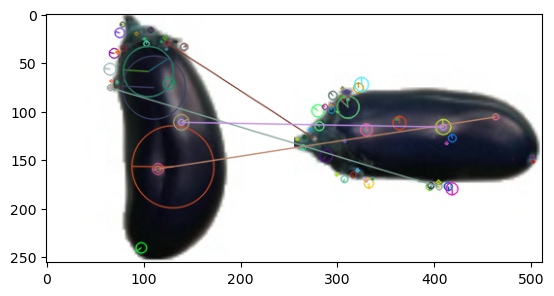

In [11]:
image = cv.imread('D:\\Nhat\\term_8\\MDS\\Image_DB\\Fruit\\Nup\\CaPhao-Nup\\Eggplant_13.jpg')
image2 = cv.imread('D:\\Nhat\\term_8\\MDS\\Image_DB\\Fruit\\Nup\\CaPhao-Nup\\Eggplant_14.jpg')
gray = corvert_to_gray(image)
gray2= corvert_to_gray(image2)
keypoints, descriptors = SIFT(gray)
keypoints2, descriptors2 = SIFT(gray2)
image = draw_keypoints(image, keypoints)
image2 = draw_keypoints(image2, keypoints2)
matches = match_keypoints(descriptors, descriptors2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
image = cv.drawMatchesKnn(image, keypoints, image2, keypoints2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.imshow(image)
print(len(keypoints),len(keypoints2))